# Introduction

# Importing required libraries

In [1]:
# Core libraries for data manipulation
import numpy as np            # For numerical operations
import pandas as pd           # For structured data (DataFrame) manipulation

# Regular expressions for pattern matching
import re

# Visualization libraries
import matplotlib.pyplot as plt   # For basic plotting
import seaborn as sns             # For statistical plots and visual styles

# Dask for out-of-core and parallel data processing (large datasets)
import dask.dataframe as dd

# Glob for file path matching (e.g., loading multiple CSV files at once)
import glob

# Check and review each csv

In [8]:
def eval_df(dataframe):
    """
    Evaluate the structure and quality of a pandas DataFrame.
    
    This function prints:
    - Data types and memory usage
    - Columns with missing values
    - Count of duplicate rows
    - Summary statistics (numeric and categorical)
    
    Parameters:
    -----------
    dataframe : pd.DataFrame
        The DataFrame to evaluate.
    """
    # Display data types and basic memory usage
    print("\n🔍 DATA TYPES & MEMORY USAGE")
    print("-" * 40)
    print(dataframe.info())

    # Check and display missing values per column
    print("\n🧩 MISSING VALUES PER COLUMN")
    print("-" * 40)
    missing_values = dataframe.isnull().sum()
    print(missing_values[missing_values > 0])

    # Check for duplicate rows
    duplicates = dataframe.duplicated().sum()
    print("\n🗃️ DUPLICATE ROWS FOUND")
    print("-" * 40)
    print(f"{duplicates} duplicate rows found.")

    # Display summary statistics (for both numeric and object types)
    print("\n📊 SUMMARY STATISTICS")
    print("-" * 40)
    print(dataframe.describe())

## Country stat

In [9]:
# Load country and country code reference data
country_stat = pd.read_csv("data/country_codes.csv")

# Preview the first few rows
country_stat.head()

,Country,Code
0,Afghanistan,AFG
1,Aland Islands,ALA
2,Albania,ALB
3,Algeria,DZA
4,American Samoa,ASM


In [10]:
# Define path to folder containing country statistics CSVs
folder_path = 'data/country_stat/'
csv_files = glob.glob(folder_path + "*.csv")

# Merge each additional CSV file into the main country_stat DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    
    # Drop 'Country' column if it's duplicated (assuming 'Code' is the unique key)
    df.drop(columns=["Country"], inplace=True)
    
    # Merge on country code
    country_stat = pd.merge(country_stat, df, on="Code", how="outer")

# Evaluate the merged DataFrame for structure, completeness, and duplicates
eval_df(country_stat)


🔍 DATA TYPES & MEMORY USAGE
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      251 non-null    object 
 1   Code                         252 non-null    object 
 2   urban_population             197 non-null    float64
 3   corruption_perception_index  180 non-null    float64
 4   gdp_per_capita               164 non-null    float64
 5   land_boundaries              246 non-null    float64
 6   coastline                    244 non-null    float64
 7   num_border_countries         244 non-null    float64
 8   border_countries             162 non-null    object 
 9   hospital_beds_per_1000       160 non-null    float64
 10  unemployment                 187 non-null    float64
 11  political_regime             174 non-null    object 
 12  gini_ind

In [11]:
# Filter for rows where the 'Country' field is missing or empty
country_stat.query("Country.isna() or Country == ''")

,Country,Code,urban_population,corruption_perception_index,gdp_per_capita,land_boundaries,coastline,num_border_countries,border_countries,hospital_beds_per_1000,unemployment,political_regime,gini_index,population_density,poverty,median_age,land_area_sqkm
42,NaN,CHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.408,NaN,NaN,NaN,NaN,NaN,NaN
252,NaN,NaN,NaN,NaN,NaN,156.0,83.8,1.0,Cyprus 156 km,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,NaN,NaN,NaN,NaN,NaN,0.0,74.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,NaN,NaN,NaN,NaN,NaN,0.0,11.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,NaN,NaN,NaN,NaN,NaN,0.0,124.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,NaN,NaN,NaN,NaN,NaN,0.0,518.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Remove rows with missing or empty country names
country_stat = country_stat[~(country_stat['Country'].isna() | (country_stat['Country'] == ''))]

# Re-evaluate the cleaned DataFrame
eval_df(country_stat)


🔍 DATA TYPES & MEMORY USAGE
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 0 to 251
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      251 non-null    object 
 1   Code                         251 non-null    object 
 2   urban_population             197 non-null    float64
 3   corruption_perception_index  180 non-null    float64
 4   gdp_per_capita               164 non-null    float64
 5   land_boundaries              241 non-null    float64
 6   coastline                    239 non-null    float64
 7   num_border_countries         239 non-null    float64
 8   border_countries             161 non-null    object 
 9   hospital_beds_per_1000       160 non-null    float64
 10  unemployment                 186 non-null    float64
 11  political_regime             174 non-null    object 
 12  gini_index   

In [14]:
# Create a copy to explore missing data safely
missing_df = country_stat.copy()

# Drop columns not relevant for current completeness analysis (e.g., border-related info for island nations)
missing_df.drop(columns=['border_countries', 'coastline', 'num_border_countries'], inplace=True)

# Add a column to count missing values per country
missing_df['missing_count'] = missing_df.isna().sum(axis=1)

# Filter only countries with at least one missing value and sort by the number of missing entries
missing_df = missing_df[missing_df['missing_count'] > 0].sort_values(by='missing_count', ascending=False)

# Display in a scrollable format (useful for large result sets)
missing_df.style.set_table_attributes('style="height:300px; overflow-y:scroll; display')

,Country,Code,urban_population,corruption_perception_index,gdp_per_capita,land_boundaries,hospital_beds_per_1000,unemployment,political_regime,gini_index,population_density,poverty,median_age,land_area_sqkm,missing_count
4,Aland Islands,ALA,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,12
20,"Bonaire, Sint Eustatius and Saba",BES,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,12
159,Mayotte,MYT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,12
188,Reunion,REU,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,12
86,Guadeloupe,GLP,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,12
155,Martinique,MTQ,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,12
247,Turkish Rep N Cyprus (temporary code),XTX,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,12
27,Saint Barthélemy,BLM,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,11
11,Antarctica,ATA,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,11
12,French Southern Territories,ATF,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,11


In [15]:
# Run the evaluation utility on countries with missing data
eval_df(missing_df)


🔍 DATA TYPES & MEMORY USAGE
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 141 entries, 4 to 250
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      141 non-null    object 
 1   Code                         141 non-null    object 
 2   urban_population             87 non-null     float64
 3   corruption_perception_index  70 non-null     float64
 4   gdp_per_capita               54 non-null     float64
 5   land_boundaries              131 non-null    float64
 6   hospital_beds_per_1000       50 non-null     float64
 7   unemployment                 76 non-null     float64
 8   political_regime             64 non-null     object 
 9   gini_index                   37 non-null     float64
 10  population_density           90 non-null     float64
 11  poverty                      37 non-null     float64
 12  median_age   

I would be conservative and would just only remove all countries that only has one variable

In [16]:
# Further filter: keep only countries missing 11 or more fields
missing_df = missing_df[missing_df['missing_count'] >= 11] \
                         .sort_values(by='missing_count', ascending=False)

# Display the most incomplete records
missing_df

,Country,Code,urban_population,corruption_perception_index,gdp_per_capita,land_boundaries,hospital_beds_per_1000,unemployment,political_regime,gini_index,population_density,poverty,median_age,land_area_sqkm,missing_count
4,Aland Islands,ALA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
20,"Bonaire, Sint Eustatius and Saba",BES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
159,Mayotte,MYT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
188,Reunion,REU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
86,Guadeloupe,GLP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
155,Martinique,MTQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
247,Turkish Rep N Cyprus (temporary code),XTX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
27,Saint Barthélemy,BLM,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
11,Antarctica,ATA,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
12,French Southern Territories,ATF,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11


In [17]:
# Drop countries from the main dataset that have too many missing values (identified in missing_df)
country_stat = country_stat[~country_stat['Code'].isin(missing_df['Code'])]

# Re-evaluate the cleaned dataset to confirm structure and completeness
eval_df(country_stat)


🔍 DATA TYPES & MEMORY USAGE
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, 1 to 251
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      208 non-null    object 
 1   Code                         208 non-null    object 
 2   urban_population             197 non-null    float64
 3   corruption_perception_index  180 non-null    float64
 4   gdp_per_capita               164 non-null    float64
 5   land_boundaries              205 non-null    float64
 6   coastline                    205 non-null    float64
 7   num_border_countries         205 non-null    float64
 8   border_countries             158 non-null    object 
 9   hospital_beds_per_1000       160 non-null    float64
 10  unemployment                 186 non-null    float64
 11  political_regime             174 non-null    object 
 12  gini_index   

## National Policy

In [18]:
# Load national policy data
national_policy = pd.read_csv('data/national_policy.csv')

# Preview the first few rows
national_policy.head()

,Code,Country,area_effect,log_type,measure,COMMENTS,implementation_date
0,AFG,Afghanistan,national,induction,Awareness campaigns,MoPH begins announcements on their facebook to...,1/24/2020
1,AFG,Afghanistan,national,induction,Health screenings in airports and border cross...,Health teams at airports will check passengers...,1/26/2020
2,AFG,Afghanistan,national,induction,Health screenings in airports and border cross...,Health screenings of all passengers at airports.,1/27/2020
3,AFG,Afghanistan,national,induction,International flights suspension,Flights to China are suspended.,1/27/2020
4,AFG,Afghanistan,national,induction,Border checks,All China and Iran nationals,2/1/2020


In [19]:
# View summary statistics for numeric columns in national_policy
national_policy.describe()

,Code,Country,area_effect,log_type,measure,COMMENTS,implementation_date
count,23923,23923,23923,23923,23923,23799,23636
unique,193,193,2,2,35,23281,359
top,GBR,United Kingdom,national,induction,Economic measures,APEC economies agree to keep markets open and ...,3/16/2020
freq,655,655,20256,19445,2980,19,342


In [20]:
# Get a sorted list of all unique policy measures in the dataset
sorted(national_policy['measure'].unique())

['Additional health/documents requirements upon arrival',
 'Amendments to funeral and burial regulations',
 'Awareness campaigns',
 'Border checks',
 'Border closure',
 'Changes in prison-related policies',
 'Checkpoints within the country',
 'Closure of businesses and public services',
 'Complete border closure',
 'Curfews',
 'Domestic travel restrictions',
 'Economic measures',
 'Emergency administrative structures activated or established',
 'Full lockdown',
 'General recommendations',
 'Health screenings in airports and border crossings',
 'Humanitarian exemptions',
 'International flights suspension',
 'Isolation and quarantine policies',
 'Limit product imports/exports',
 'Limit public gatherings',
 'Lockdown of refugee/idp camps or other minorities',
 'Mass population testing',
 'Military deployment',
 'Obligatory medical tests not related to COVID-19',
 'Other public health measures enforced',
 'Partial lockdown',
 'Psychological assistance and medical social work',
 'Requireme

There are around 36 measures that the government made. I would focus on the measures that would directly affect population mobility

In [21]:
# List of specific policy measures to focus on (lockdowns, travel, borders, etc.)
measures_to_focus = [
    'Additional health/documents requirements upon arrival',
    'Border checks',
    'Border closure',
    'Checkpoints within the country',
    'Closure of business and public services',
    'Complete border closure',
    'Curfews',
    'Domestic travel restrictions',
    'Full lockdown',
    'Health screenings in airports and border crossings',
    'Humanitarian exemptions',
    'International flights suspension',
    'Isolation and quarantine policies',
    'Limit public gatherings',
    'Lockdown of refugee/idp camps or other minorities',
    'Partial lockdown',
    'School closure'
]

In [22]:
# Filter national_policy to include only the selected high-priority measures
national_policy = national_policy[national_policy['measure'].isin(measures_to_focus)]

In [23]:
# Create a new column combining the type of area affected and log type
# Example: 'national_introduction', 'regional_phase-out'
national_policy['measure_type'] = national_policy['area_effect'] + "_" + national_policy['log_type']

# Drop unnecessary columns to tidy up the DataFrame
national_policy.drop(columns=['area_effect', 'log_type', 'COMMENTS'], inplace=True)

# Drop duplicates to keep one unique log per country, measure, and day
national_policy.drop_duplicates(inplace=True)

In [24]:
# Convert the implementation date column to datetime format (invalid values become NaT)
national_policy['implementation_date'] = pd.to_datetime(national_policy['implementation_date'], errors='coerce')

# Group by country and date, then nest all measures under measure_type as a dictionary
national_policy = (
    national_policy
    .groupby(['Code', 'Country', 'implementation_date'])
    .apply(lambda g: g.groupby('measure_type')['measure'].unique().apply(list).to_dict())
    .reset_index(name='measure_dict')
)

/tmp/ipykernel_1296/3831648382.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.groupby('measure_type')['measure'].unique().apply(list).to_dict())


In [25]:
# Function to count number of policy measures by type for each row
def count_measures(df, type_measures):
    """
    Add a column for each measure type indicating how many measures were logged on a given date.

    Parameters:
    -----------
    df : pd.DataFrame
        The DataFrame with a 'measure_dict' column.

    type_measures : list of str
        The keys in the measure_dict to count (e.g., 'national_induction').

    Returns:
    --------
    pd.DataFrame
        The original DataFrame with new columns added for each measure count.
    """
    for type in type_measures:
        new_col = f"{type}_num"
        df[new_col] = df['measure_dict'].apply(
            lambda x: len(x.get(type)) if isinstance(x, dict) and x.get(type) is not None else 0
        )
    return df

# Define the types of measure logs to count
type_measures = [
    'national_induction',
    'national_phaseout',
    'local_induction',
    'local_phaseout'
]

# Apply the counting function to the national policy dataset
national_policy = count_measures(national_policy, type_measures)

# View the updated dataset
national_policy

,Code,Country,implementation_date,measure_dict,national_induction_num,national_phaseout_num,local_induction_num,local_phaseout_num
0,AFG,Afghanistan,2020-01-26,{'national_induction': ['Health screenings in ...,1,0,0,0
1,AFG,Afghanistan,2020-01-27,{'national_induction': ['Health screenings in ...,2,0,0,0
2,AFG,Afghanistan,2020-02-01,{'national_induction': ['Border checks']},1,0,0,0
3,AFG,Afghanistan,2020-02-02,{'national_induction': ['Isolation and quarant...,1,0,0,0
4,AFG,Afghanistan,2020-02-12,{'local_induction': ['Isolation and quarantine...,1,0,1,0
...,...,...,...,...,...,...,...,...
4942,ZWE,Zimbabwe,2020-05-04,{'national_induction': ['Partial lockdown']},1,0,0,0
4943,ZWE,Zimbabwe,2020-05-05,{'national_phaseout': ['Limit public gathering...,0,1,0,0
4944,ZWE,Zimbabwe,2020-05-17,"{'national_induction': ['Partial lockdown'], '...",1,1,0,0
4945,ZWE,Zimbabwe,2020-05-21,{'national_phaseout': ['Limit public gathering...,0,1,0,0


In [28]:
national_policy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4947 entries, 0 to 4946
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Code                    4947 non-null   object        
 1   Country                 4947 non-null   object        
 2   implementation_date     4947 non-null   datetime64[ns]
 3   measure_dict            4947 non-null   object        
 4   national_induction_num  4947 non-null   int64         
 5   national_phaseout_num   4947 non-null   int64         
 6   local_induction_num     4947 non-null   int64         
 7   local_phaseout_num      4947 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 309.3+ KB


In [26]:
# Check the oxford covid19 government response tracker
oxford_df = pd.read_csv('data/oxcgt.csv')
oxford_df.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,...,V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0,NaN,0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0,NaN,0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0,NaN,0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0,NaN,0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0,NaN,0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0


In [27]:
oxford_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202760 entries, 0 to 202759
Data columns (total 56 columns):
 #   Column                                                                           Non-Null Count   Dtype  
---  ------                                                                           --------------   -----  
 0   CountryName                                                                      202760 non-null  object 
 1   CountryCode                                                                      202760 non-null  object 
 2   RegionName                                                                       0 non-null       float64
 3   RegionCode                                                                       0 non-null       float64
 4   Jurisdiction                                                                     202760 non-null  object 
 5   Date                                                                             202760 non-null  int64  
 

In [29]:
# make the date column into a datetime
oxford_df['Date'] = pd.to_datetime(oxford_df['Date'].astype(str), format='%Y%m%d')

In [31]:
oxford_df.columns

Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode',
       'Jurisdiction', 'Date', 'C1M_School closing', 'C1M_Flag',
       'C2M_Workplace closing', 'C2M_Flag', 'C3M_Cancel public events',
       'C3M_Flag', 'C4M_Restrictions on gatherings', 'C4M_Flag',
       'C5M_Close public transport', 'C5M_Flag',
       'C6M_Stay at home requirements', 'C6M_Flag',
       'C7M_Restrictions on internal movement', 'C7M_Flag',
       'C8EV_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'H6M_Facial Coverings', 'H6M_Flag', 'H7_Vaccination policy', 'H7_Flag',
       'H8M_Protection of elderly people', 'H8M_Flag',
       'V1_Vaccine Prioritisation (summary)',
       'V2A_Vaccine Availability (summary)',
      

In [36]:
# merge the flag columns
def merge_with_flag(row, list_of_columns):
    """
    Combine a policy intensity value with its flag to create a modified policy score.

    If flag is:
    - NaN → return base value
    - 0 → return base value + 0.5
    - 1 → return base value + 1

    Parameters:
    - row: a row of the DataFrame
    - list_of_columns: [base_col, flag_col]

    Returns:
    - float: enhanced policy score
    """
    if pd.isna(row[list_of_columns[1]]):
        return row[list_of_columns[0]]
    elif row[list_of_columns[1]] == 0:
        return row[list_of_columns[0]] + 0.5
    else:
        return row[list_of_columns[0]] + 1
# use the function
oxford_df['c1m_school_closing'] = oxford_df.apply(lambda x: merge_with_flag(x, ['C1M_School closing', 'C1M_Flag']), axis=1)
oxford_df['c2m_workplace_closing'] = oxford_df.apply(lambda x: merge_with_flag(x, ['C2M_Workplace closing', 'C2M_Flag']), axis=1)
oxford_df['c3m_cancel_public_events'] = oxford_df.apply(lambda x: merge_with_flag(x, ['C3M_Cancel public events', 'C3M_Flag']), axis=1)
oxford_df['c4m_restrictions_on_gatherings'] = oxford_df.apply(lambda x: merge_with_flag(x, ['C4M_Restrictions on gatherings', 'C4M_Flag']), axis=1)
oxford_df['c5m_close_public_transport'] = oxford_df.apply(lambda x: merge_with_flag(x, ['C5M_Close public transport', 'C5M_Flag']), axis=1)
oxford_df['c6m_stay_at_home_requirements'] = oxford_df.apply(lambda x: merge_with_flag(x, ['C6M_Stay at home requirements', 'C6M_Flag']), axis=1)
oxford_df['c7m_restrictions_on_internal_movement'] = oxford_df.apply(lambda x: merge_with_flag(x, ['C7M_Restrictions on internal movement', 'C7M_Flag']), axis=1)
oxford_df['e1_income_support'] = oxford_df.apply(lambda x: merge_with_flag(x, ['E1_Income support', 'E1_Flag']), axis=1)
oxford_df['h1_public_information_campaigns'] = oxford_df.apply(lambda x: merge_with_flag(x, ['H1_Public information campaigns', 'H1_Flag']), axis=1)
oxford_df['h6m_facial_coverings'] = oxford_df.apply(lambda x: merge_with_flag(x, ['H6M_Facial Coverings', 'H6M_Flag']), axis=1)
oxford_df['h7m_vaccination_policy'] = oxford_df.apply(lambda x: merge_with_flag(x, ['H7_Vaccination policy', 'H7_Flag']), axis=1)

## Mobility data

In [ ]:
# Columns to exclude from loading
excluded_cols = ['iso_3166_2_code', 'census_flips_code', 'place_id']

# Sample the file to get full column list, then exclude unwanted ones
all_cols = dd.read_csv('data/global_mobility_report.csv', sample=10000).columns.tolist()
usecols = [col for col in all_cols if col not in excluded_cols]

# Load the dataset using only the desired columns
# assume_missing=True is important for mixed types in large files
mobility_data = dd.read_csv('data/global_mobility_report.csv', usecols=usecols, assume_missing=True)

# Filter rows that have entry for sub_region_1, sub_region_2, metro_area
# Filter date up until 2021-01-31

#mobility_data['date'] = dd.to_datetime(mobility_data['date'], errors='coerce')
#mobility_data = mobility_data[mobility_data[['sub_region_1', 'sub_region_2', 'metro_area']].isnull().all(axis=1) &
 #                             (mobility_data['date']<='2021-01-31')]

In [ ]:
# Columns to include (mobility trends + region info + date)
usecols = [
    "country_region_code", "country_region", "sub_region_1", "sub_region_2", "metro_area",
    "date", "retail_and_recreation_percent_change_from_baseline",
    "grocery_and_pharmacy_percent_change_from_baseline",
    "parks_percent_change_from_baseline",
    "transit_stations_percent_change_from_baseline",
    "workplaces_percent_change_from_baseline",
    "residential_percent_change_from_baseline"
]

# Explicit dtypes to avoid Dask inference issues
dtype_fix = {
    'sub_region_1': 'object',
    'sub_region_2': 'object',
    'metro_area': 'object'
}

# Load the dataset with parsing and type fixes
df = dd.read_csv(
    'data/global_mobility_report.csv',
    usecols=usecols,
    dtype=dtype_fix,
    parse_dates=['date'],
    assume_missing=True
)

# Filter: only country-level data + dates up to Jan 31, 2021
missing_cols = ['sub_region_1', 'sub_region_2', 'metro_area']
filtered = df[
    df[missing_cols].isnull().all(axis=1) &
    (df['date'] <= '2021-01-31')
]

# Safely preview the filtered result
print(filtered.head(10))

  country_region_code        country_region sub_region_1 sub_region_2  \
0                  AE  United Arab Emirates         <NA>         <NA>   
1                  AE  United Arab Emirates         <NA>         <NA>   
2                  AE  United Arab Emirates         <NA>         <NA>   
3                  AE  United Arab Emirates         <NA>         <NA>   
4                  AE  United Arab Emirates         <NA>         <NA>   
5                  AE  United Arab Emirates         <NA>         <NA>   
6                  AE  United Arab Emirates         <NA>         <NA>   
7                  AE  United Arab Emirates         <NA>         <NA>   
8                  AE  United Arab Emirates         <NA>         <NA>   
9                  AE  United Arab Emirates         <NA>         <NA>   

  metro_area       date  retail_and_recreation_percent_change_from_baseline  \
0       <NA> 2020-02-15                                                0.0    
1       <NA> 2020-02-16               

: 

In [ ]:
# Compute the latest date in the filtered dataset
filtered['date'].max().compute()

In [ ]:
# Randomly sample 0.5% of the filtered country-level mobility data
# Use compute() to convert Dask DataFrame to a Pandas DataFrame for in-memory work
sample_df = filtered.sample(frac=0.005, random_state=1).compute()

# Display the sampled subset
sample_df

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
13905,AO,Angola,<NA>,<NA>,<NA>,2021-01-12,-6.0,0.0,28.0,-3.0,-9.0,4.0
7957,AF,Afghanistan,<NA>,<NA>,<NA>,2020-09-19,35.0,21.0,15.0,-11.0,1.0,1.0
333,AE,United Arab Emirates,<NA>,<NA>,<NA>,2021-01-13,-18.0,-1.0,-31.0,-34.0,-20.0,7.0
429500,AT,Austria,<NA>,<NA>,<NA>,2020-09-08,2.0,-5.0,112.0,-13.0,-28.0,1.0
18117,AR,Argentina,<NA>,<NA>,<NA>,2020-06-24,-62.0,-21.0,-83.0,-53.0,-27.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...
493706,YE,Yemen,<NA>,<NA>,<NA>,2020-05-04,-14.0,-9.0,-17.0,-20.0,-14.0,5.0
506376,ZW,Zimbabwe,<NA>,<NA>,<NA>,2020-05-12,-35.0,-26.0,-30.0,-53.0,-31.0,29.0
410222,UY,Uruguay,<NA>,<NA>,<NA>,2020-07-12,-37.0,-13.0,-66.0,-42.0,-8.0,11.0
431494,VN,Vietnam,<NA>,<NA>,<NA>,2020-08-08,-20.0,2.0,-25.0,-21.0,-8.0,10.0


In [ ]:
filtered.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [ ]:
# Drop unnecessary location-specific columns (since we are using only country-level data)
filtered = filtered.drop(columns=['sub_region_1', 'sub_region_2', 'metro_area'])

# Get a sorted list of unique country names (excluding NaNs)
sorted(filtered['country_region'].dropna().unique().compute())

['Afghanistan',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Aruba',
 'Australia',
 'Austria',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Czechia',
 "Côte d'Ivoire",
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea-Bissau',
 'Haiti',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'India',
 'Indonesia',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Kyrgyzstan',
 'Laos',
 'Latvia',
 'Lebanon',
 'Libya',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Malaysia',
 'Mali',
 'Malta',
 'Mauritius',
 'Mexico',
 'Moldova',
 'Mongolia',
 'Morocco',
 'M

In [ ]:
# Count the number of policy entries per country from national_policy
# Each row represents a (Country, Code) with the count of unique policy dates
countries = (
    national_policy
    .groupby(['Country', 'Code'])['measure_dict']
    .count()
    .reset_index()
    .rename(columns={'measure_dict': 'num_policy_entries'})
)

# Display the summary
countries

In [ ]:
# Get unique country names from the mobility dataset (as a Pandas array)
country_in_mob = filtered['country_region'].unique().compute()

In [ ]:
len(country_in_mob)

135

In [ ]:
len(np.intersect1d(country_in_mob, countries['Country']))

130

In [ ]:
# Get countries present in both mobility and policy datasets
country_in_both = np.intersect1d(country_in_mob, countries['Country'])

In [ ]:
# Get sorted list of countries in mobility data but NOT in the national policy data
missing_in_policy = sorted(country_in_mob[~country_in_mob.isin(country_in_both)])
missing_in_policy

['Aruba', "Côte d'Ivoire", 'Puerto Rico', 'Réunion', 'Taiwan']

In [ ]:
# Countries in mobility data but NOT in policy data
print("In mobility data but missing in policy data:")
for x in sorted(country_in_mob[~country_in_mob.isin(country_in_both)]):
    print(f"  → {x}")

# Countries in policy data but NOT in mobility data
print("\nIn policy data but missing in mobility data:")
for x in sorted(countries['Country'][~countries['Country'].isin(country_in_both)]):
    print(f"  → {x}")

Afghanistan
Albania
Algeria
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burundi
CAR
Cambodia
Cameroon
Canada
Cape Verde
Chad
Chile
China
Colombia
Comoros
Congo
Costa Rica
Croatia
Cuba
Cyprus
Czechia
C�te d'Ivoire
DPRK
DRC
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Marshall Islands
Mauritania
Mauritius
Mexico
Micronesia
Moldova
Mongolia
Montenegro
Morocco
Mozambiq

Aruba - not in policy
Czechia - Czech Republic
Côte d'Ivoire - CÃ´te d'Ivoire
Myanmar (Burma) - Myanmar
North Macedonia - Macedonia
Puerto Rico - not in policy
Réunion - not in policy
South Korea - Korea, Republic of
Taiwan - not in policy
The Bahamas - Bahamas


In [ ]:
# Fix character encoding issue in Côte d'Ivoire
national_policy['Country'] = national_policy['Country'].replace({"C�te d'Ivoire": "Côte d'Ivoire"})

In [ ]:
# Rebuild the policy summary after fix
countries = national_policy.groupby(['Country', 'Code'])['measure_dict'].count().reset_index()

# Get list of unique country names from mobility data
country_in_mob = filtered['country_region'].unique().compute()

# Find matching countries in both datasets
country_in_both = np.intersect1d(country_in_mob, countries['Country'])

# Print countries in mobility data that are NOT in the policy data
sorted(country_in_mob[~country_in_mob.isin(country_in_both)])

['Aruba', 'Puerto Rico', 'Réunion', 'Taiwan']

In [ ]:
# Filter mobility data to only include countries that also exist in the policy dataset
country_mobility = filtered[filtered['country_region'].isin(country_in_both)]

# Preview a 0.5% sample to verify results
country_mobility.sample(frac=0.005, random_state=1).compute()

,country_region_code,country_region,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
13905,AO,Angola,2021-01-12,-6.0,0.0,28.0,-3.0,-9.0,4.0
7957,AF,Afghanistan,2020-09-19,35.0,21.0,15.0,-11.0,1.0,1.0
333,AE,United Arab Emirates,2021-01-13,-18.0,-1.0,-31.0,-34.0,-20.0,7.0
429500,AT,Austria,2020-09-08,2.0,-5.0,112.0,-13.0,-28.0,1.0
18117,AR,Argentina,2020-06-24,-62.0,-21.0,-83.0,-53.0,-27.0,17.0
...,...,...,...,...,...,...,...,...,...
493706,YE,Yemen,2020-05-04,-14.0,-9.0,-17.0,-20.0,-14.0,5.0
506376,ZW,Zimbabwe,2020-05-12,-35.0,-26.0,-30.0,-53.0,-31.0,29.0
410222,UY,Uruguay,2020-07-12,-37.0,-13.0,-66.0,-42.0,-8.0,11.0
431494,VN,Vietnam,2020-08-08,-20.0,2.0,-25.0,-21.0,-8.0,10.0


## Save the data

In [ ]:
# Save the cleaned country statistics dataset
country_stat.to_csv('data/cleaned/Country_stat.csv', index=False)

# Save the cleaned national policy dataset
national_policy.to_csv('data/cleaned/National_policy.csv', index=False)

## Merge the mobility data with the policy data

In [ ]:
national_policy

,Code,Country,implementation_date,measure_dict,national_induction_num,national_phaseout_num,local_induction_num,local_phaseout_num
0,AFG,Afghanistan,2020-01-26,{'national_induction': ['Health screenings in ...,1,0,0,0
1,AFG,Afghanistan,2020-01-27,{'national_induction': ['Health screenings in ...,2,0,0,0
2,AFG,Afghanistan,2020-02-01,{'national_induction': ['Border checks']},1,0,0,0
3,AFG,Afghanistan,2020-02-02,{'national_induction': ['Isolation and quarant...,1,0,0,0
4,AFG,Afghanistan,2020-02-12,{'local_induction': ['Isolation and quarantine...,1,0,1,0
...,...,...,...,...,...,...,...,...
4942,ZWE,Zimbabwe,2020-05-04,{'national_induction': ['Partial lockdown']},1,0,0,0
4943,ZWE,Zimbabwe,2020-05-05,{'national_phaseout': ['Limit public gathering...,0,1,0,0
4944,ZWE,Zimbabwe,2020-05-17,"{'national_induction': ['Partial lockdown'], '...",1,1,0,0
4945,ZWE,Zimbabwe,2020-05-21,{'national_phaseout': ['Limit public gathering...,0,1,0,0


In [ ]:
countries

,Country,Code,measure_dict
0,Afghanistan,AFG,15
1,Albania,ALB,21
2,Algeria,DZA,35
3,Angola,AGO,36
4,Antigua and Barbuda,ATG,22
...,...,...,...
188,Venezuela,VEN,25
189,Vietnam,VNM,30
190,Yemen,YEM,17
191,Zambia,ZMB,5


In [ ]:
# Rename columns for consistent merge keys
country_mobility = country_mobility.rename(columns={'country_region': 'Country'})
national_policy = national_policy.rename(columns={'implementation_date': 'date'})

# Extract country–code mapping from national policy data
countries = national_policy.groupby(['Country', 'Code'])['measure_dict'].count().reset_index()

# Merge country codes into the mobility dataset
country_mobility = country_mobility.merge(countries[['Country', 'Code']], on='Country', how='left')

# Drop 'Country' from policy data (already represented by 'Code')
national_policy = national_policy.drop(columns='Country')

# Merge mobility and policy data by country code and date
timeline = country_mobility.merge(national_policy, on=['Code', 'date'], how='left')

# Drop unused identifier (already linked via 'Code')
timeline = timeline.drop(columns='country_region_code')

# Preview a random 0.5% sample of the final merged dataset
timeline.sample(frac=0.005, random_state=1).compute()

,Country,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Code,measure_dict,national_induction_num,national_phaseout_num,local_induction_num,local_phaseout_num
1337,Angola,2021-01-12,-6.0,0.0,28.0,-3.0,-9.0,4.0,AGO,<NA>,NaN,NaN,NaN,NaN
524,Afghanistan,2020-09-19,35.0,21.0,15.0,-11.0,1.0,1.0,AFG,<NA>,NaN,NaN,NaN,NaN
333,United Arab Emirates,2021-01-13,-18.0,-1.0,-31.0,-34.0,-20.0,7.0,ARE,<NA>,NaN,NaN,NaN,NaN
1915,Austria,2020-09-08,2.0,-5.0,112.0,-13.0,-28.0,1.0,AUT,<NA>,NaN,NaN,NaN,NaN
1487,Argentina,2020-06-24,-62.0,-21.0,-83.0,-53.0,-27.0,17.0,ARG,<NA>,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,Yemen,2020-05-04,-14.0,-9.0,-17.0,-20.0,-14.0,5.0,YEM,<NA>,NaN,NaN,NaN,NaN
2199,Zimbabwe,2020-05-12,-35.0,-26.0,-30.0,-53.0,-31.0,29.0,ZWE,<NA>,NaN,NaN,NaN,NaN
148,Uruguay,2020-07-12,-37.0,-13.0,-66.0,-42.0,-8.0,11.0,URY,<NA>,NaN,NaN,NaN,NaN
879,Vietnam,2020-08-08,-20.0,2.0,-25.0,-21.0,-8.0,10.0,VNM,<NA>,NaN,NaN,NaN,NaN


In [ ]:
# Export the Philippines timeline to CSV
timeline[timeline['Code'] == 'PHL'].compute().to_csv('data/cleaned/philippines.csv', index=False)

# Export the UK (Britain) timeline to CSV
timeline[timeline['Code'] == 'GBR'].compute().to_csv('data/cleaned/britain.csv', index=False)

# Export a 5% random sample of the entire timeline
timeline.sample(frac=0.05, random_state=1).compute().to_csv('data/cleaned/sample.csv', index=False)

Get a sample country and check

In [ ]:
# Focus on United Kingdom for exploratory analysis or graphing
country_df = timeline[timeline['Code'] == 'GBR'].compute()
country_df

,Country,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Code,measure_dict,national_induction_num,national_phaseout_num,local_induction_num,local_phaseout_num
0,United Kingdom,2020-02-15,-12.0,-7.0,-35.0,-12.0,-4.0,2.0,GBR,<NA>,NaN,NaN,NaN,NaN
1,United Kingdom,2020-02-16,-7.0,-6.0,-28.0,-7.0,-3.0,1.0,GBR,<NA>,NaN,NaN,NaN,NaN
2,United Kingdom,2020-02-17,10.0,1.0,24.0,-2.0,-14.0,2.0,GBR,<NA>,NaN,NaN,NaN,NaN
3,United Kingdom,2020-02-18,7.0,-1.0,20.0,-3.0,-14.0,2.0,GBR,<NA>,NaN,NaN,NaN,NaN
4,United Kingdom,2020-02-19,6.0,-2.0,8.0,-4.0,-14.0,3.0,GBR,<NA>,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,United Kingdom,2021-01-27,-60.0,-21.0,-13.0,-63.0,-50.0,20.0,GBR,<NA>,NaN,NaN,NaN,NaN
348,United Kingdom,2021-01-28,-61.0,-21.0,-12.0,-63.0,-50.0,20.0,GBR,<NA>,NaN,NaN,NaN,NaN
349,United Kingdom,2021-01-29,-60.0,-16.0,-11.0,-61.0,-49.0,20.0,GBR,<NA>,NaN,NaN,NaN,NaN
350,United Kingdom,2021-01-30,-67.0,-22.0,-37.0,-67.0,-33.0,15.0,GBR,<NA>,NaN,NaN,NaN,NaN


In [ ]:
numerical_md = ['retail_and_recreation_percent_change_from_baseline', 
             'grocery_and_pharmacy_percent_change_from_baseline', 
             'parks_percent_change_from_baseline',
             'transit_stations_percent_change_from_baseline',
             'workplaces_percent_change_from_baseline',
             'residential_percent_change_from_baseline']
numerical_np = ['national_induction_num',
                'national_phaseout_num',
                'local_induction_num',
                'local_phaseout_num']

In [ ]:
# Replace NaNs in policy count columns with 0 (no policies that day)
country_df[numerical_np] = country_df[numerical_np].fillna(0)

# Ensure measure_dict is always a dict (replace NaNs with empty dicts)
country_df['measure_dict'] = country_df['measure_dict'].apply(lambda x: {} if pd.isna(x) else x)

In [ ]:
def plot_type(df, columns, type):
    """
    Plot selected columns from a DataFrame over time using line or stackplot.

    Parameters:
    - df: DataFrame with a 'date' column
    - columns: list of column names to plot
    - type: 'line' or 'stackplot'
    """
    plt.figure(figsize=(12, 6))
    
    if type == 'line':
        return [plt.plot(df['date'], df[col], label=col) for col in columns]
    
    elif type == 'stackplot':
        return plt.stackplot(df['date'], *[df[col] for col in columns], labels=columns)
    
def graph_columns(df, columns, type):
    """
    Generate a time series graph with title and styling.

    Parameters:
    - df: DataFrame
    - columns: list of columns to plot
    - type: 'line' or 'stackplot'
    """
    plot_type(df, columns, type)
    plt.title(f"{type.capitalize()} Chart of Selected Columns")
    plt.xlabel("Date")
    plt.ylabel("Values")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

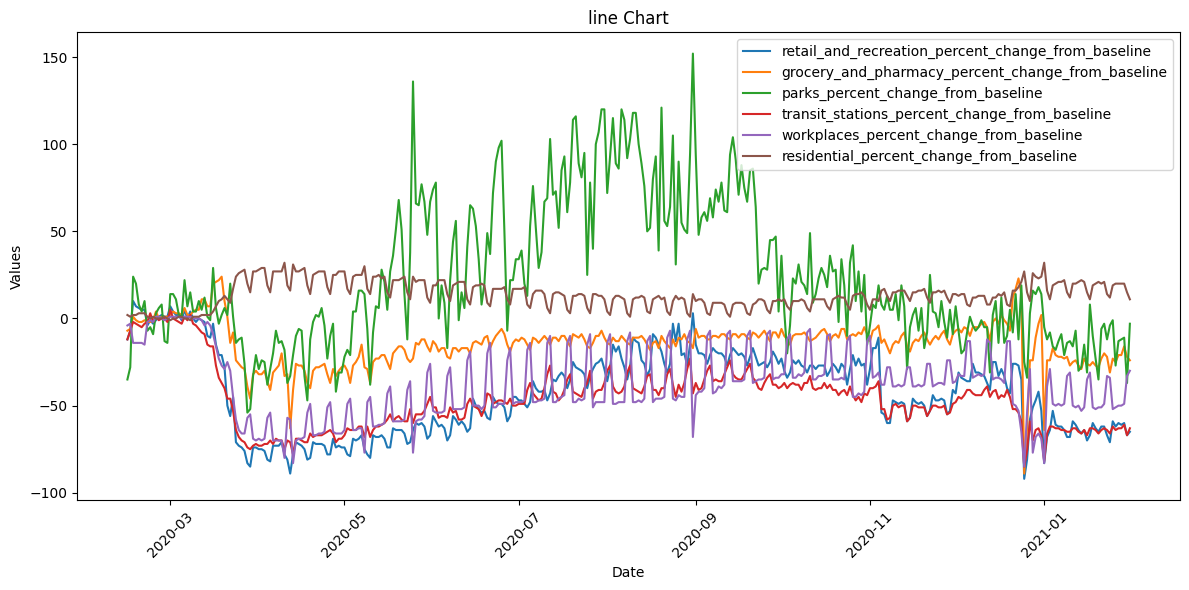

In [ ]:
graph_columns(country_df, numerical_md, "line")

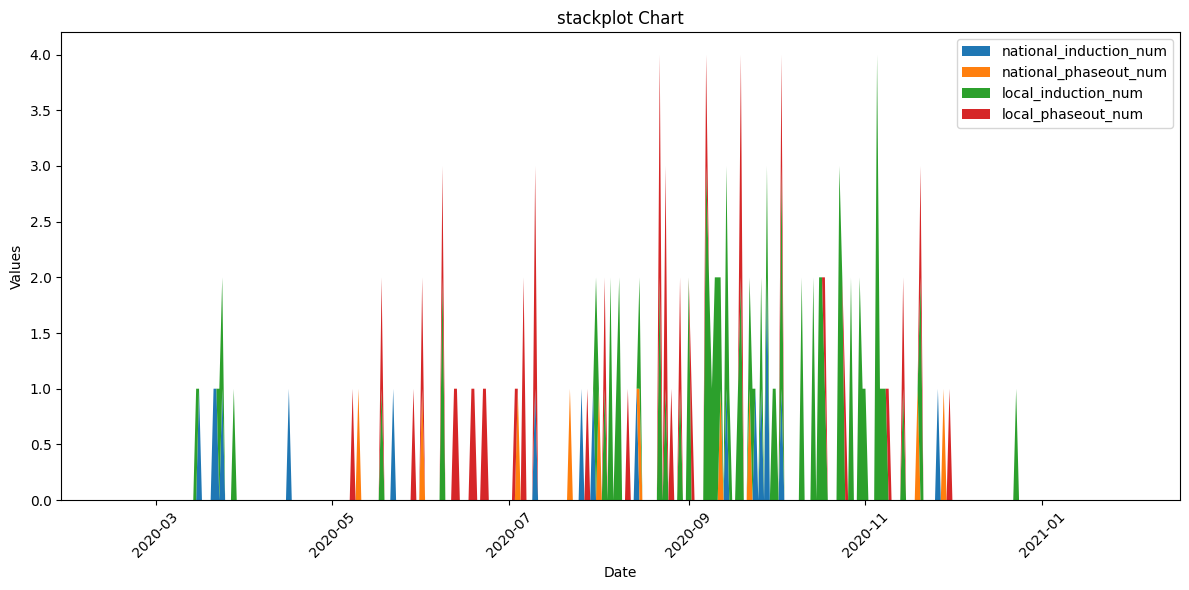

In [ ]:
graph_columns(country_df, numerical_np, "stackplot")

There are a lot of day to day variability so to fix this I would get the mean by week

In [ ]:
# Ensure 'date' is in datetime format
country_df['date'] = pd.to_datetime(country_df['date'])

# Convert to weekly periods, then extract the starting date of each week
country_df['date'] = country_df['date'].dt.to_period('W').apply(lambda r: r.start_time)

In [ ]:
from collections import defaultdict

def merge_dicts(series):
    """
    Merge a series of dictionaries into a single dictionary.

    Values (which are lists) are combined by key using set union.

    Parameters:
    - series : pd.Series of dictionaries (e.g., from groupby().apply())

    Returns:
    - A single dictionary where each key maps to a sorted list of unique values.
    """
    combined = defaultdict(set)

    for dictionary in series.dropna():
        for key, value_list in dictionary.items():
            combined[key].update(value_list)  # Union values into a set

    # Convert sets to sorted lists for stable, readable output
    return {key: sorted(list(values)) for key, values in combined.items()}

In [ ]:
import ast

# Safely convert stringified dictionaries back into actual dicts
country_df['measure_dict'] = country_df['measure_dict'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) and isinstance(x, str) else {}
)

# Aggregate by week: average mobility + merged policy types
country_df = (
    country_df
    .groupby(['Code', 'Country', 'date'])
    .agg({
        'retail_and_recreation_percent_change_from_baseline': 'mean',
        'grocery_and_pharmacy_percent_change_from_baseline': 'mean',
        'parks_percent_change_from_baseline': 'mean',
        'transit_stations_percent_change_from_baseline': 'mean',
        'workplaces_percent_change_from_baseline': 'mean',
        'residential_percent_change_from_baseline': 'mean',
        'measure_dict': merge_dicts
    })
    .reset_index()
)

In [ ]:
def count_measures(df, type_measures):
    """
    Add columns that count how many policy measures exist in each 'measure_dict' by type.

    Parameters:
    - df : pd.DataFrame with 'measure_dict'
    - type_measures : list of measure_type keys to count (e.g. 'national_induction')

    Returns:
    - df : the same DataFrame with new *_num columns added
    """
    for type in type_measures:
        new_col = f"{type}_num"
        df[new_col] = df['measure_dict'].apply(
            lambda x: len(x.get(type)) if isinstance(x, dict) and x.get(type) is not None else 0
        )
    return df

# Define which measure types to count
type_measures = [
    'national_induction',
    'national_phaseout',
    'local_induction',
    'local_phaseout'
]

# Apply counting function
country_df = count_measures(country_df, type_measures)

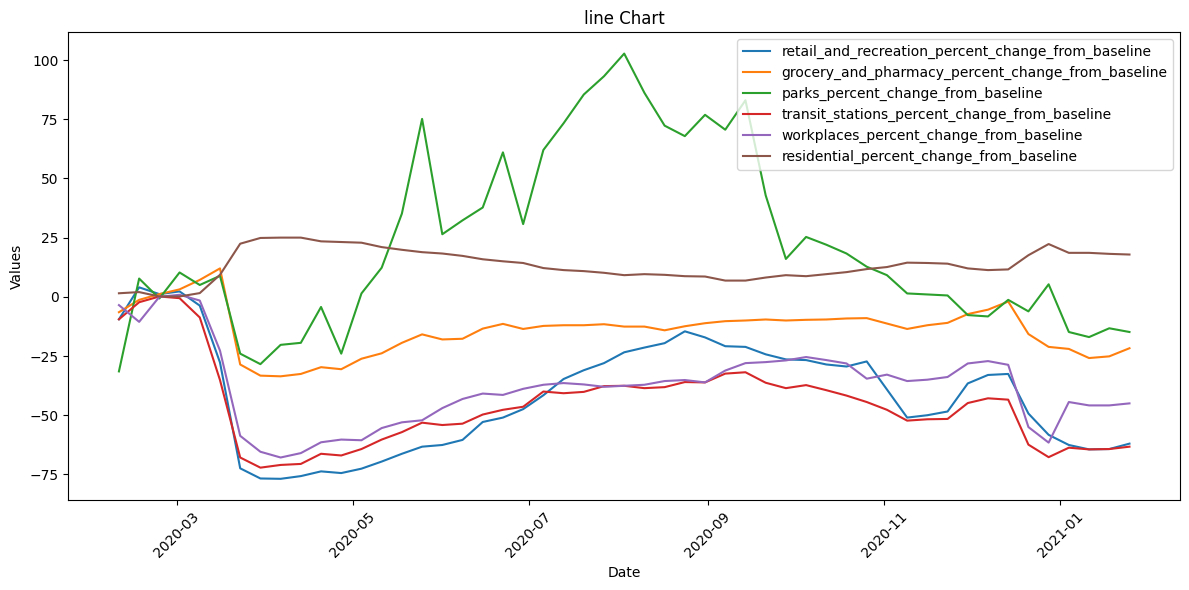

In [ ]:
graph_columns(country_df, numerical_md, "line")

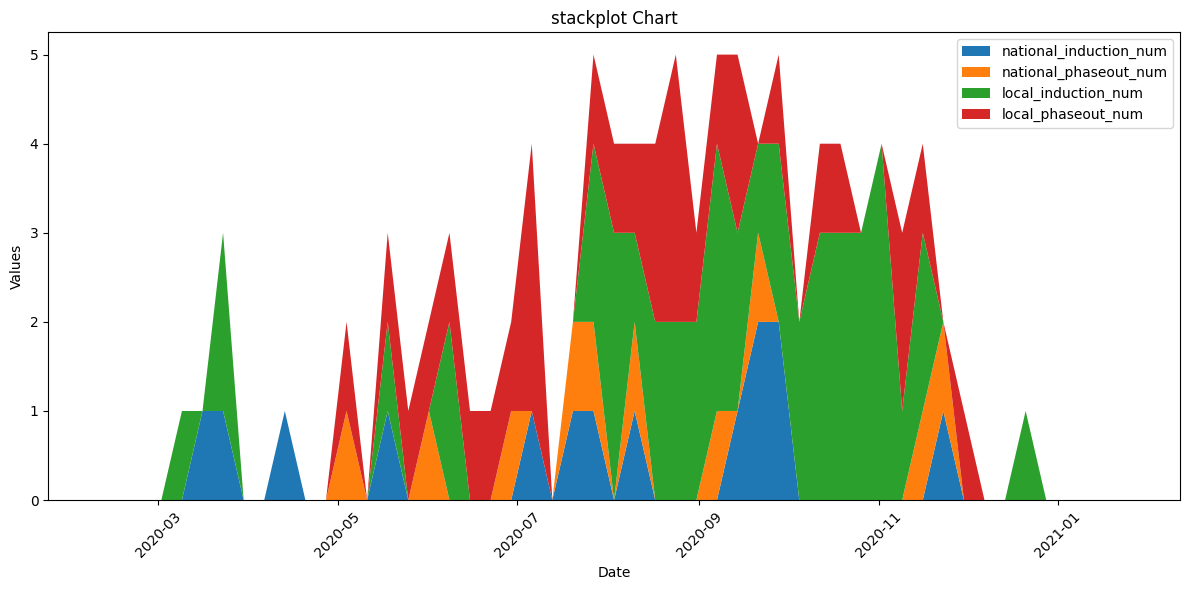

In [ ]:
graph_columns(country_df, numerical_np, "stackplot")

In [55]:
code_list = timeline['Code'].dropna().unique().compute()

KeyboardInterrupt: 

### Do the same for all countries

In [ ]:
# chage date to week
timeline['date'] = pd.to_datetime(country_df['date'])
timeline['date'] = timeline['date'].dt.to_period('W').apply(lambda r: r.start_time, meta=('date', 'datetime64[ns]'))
# define groupby + aggregate
def group_and_aggregate(part):
    return part.groupby(['Code', 'Country', 'date']).agg({
    'retail_and_recreation_percent_change_from_baseline' : 'mean',
    'grocery_and_pharmacy_percent_change_from_baseline' : 'mean',
    'parks_percent_change_from_baseline' : 'mean',
    'transit_stations_percent_change_from_baseline' : 'mean',
    'workplaces_percent_change_from_baseline' : 'mean',
    'residential_percent_change_from_baseline' : 'mean',
    'measure_dict' : merge_dicts
})
# ensure dask groups rows by country into same partitition
timeline['index'] = timeline['Code']
timeline = timeline.set_index('index', sorted=False, drop=False)
# create a meta
meta = pd.DataFrame({
    'Code': pd.Series(dtype='str'),
    'Country': pd.Series(dtype='str'),
    'date': pd.Series(dtype='datetime64[ns]'),
    'retail_and_recreation_percent_change_from_baseline': pd.Series(dtype='float'),
    'grocery_and_pharmacy_percent_change_from_baseline': pd.Series(dtype='float'),
    'parks_percent_change_from_baseline': pd.Series(dtype='float'),
    'transit_stations_percent_change_from_baseline': pd.Series(dtype='float'),
    'workplaces_percent_change_from_baseline': pd.Series(dtype='float'),
    'residential_percent_change_from_baseline': pd.Series(dtype='float'),
    'measure_dict': pd.Series([{}], dtype='object')
})
# apply using map_partitions
timeline = timeline.map_partitions(group_and_aggregate, meta = meta)
# reset index
timeline = timeline.reset_index()
type_measures = ['national_induction',
                 'national_phaseout',
                 'local_induction',
                 'local_phaseout']
def count_measures(df, type_measures):
    for type in type_measures:
        new_col = type+"_num"
        df[new_col] = df['measure_dict'].apply(lambda x: len(x.get(type)) if x.get(type) is not None else 0)
    return df
timeline = count_measures(timeline, type_measures)
timeline

In [54]:
timeline[timeline['Code']=='GBR'].compute()

KeyboardInterrupt: 

In [112]:
type_measures = ['national_induction',
                 'national_phaseout',
                 'local_induction',
                 'local_phaseout']
timeline = count_measures(timeline, type_measures)
timeline

ValueError: Metadata inference failed in `apply`.

You have supplied a custom function and Dask is unable to 
determine the type of output that that function returns. 

To resolve this please provide a meta= keyword.
The docstring of the Dask function you ran should have more information.

Original error is below:
------------------------
AttributeError("'str' object has no attribute 'get'")

Traceback:
---------
  File "/home/biogear13/country-factors-mobility/country-factors-mobility/venv/lib/python3.12/site-packages/dask/dataframe/utils.py", line 149, in raise_on_meta_error
    yield
  File "/home/biogear13/country-factors-mobility/country-factors-mobility/venv/lib/python3.12/site-packages/dask/dataframe/dask_expr/_expr.py", line 4054, in emulate
    return func(*_extract_meta(args, True), **_extract_meta(kwargs, True))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/biogear13/country-factors-mobility/country-factors-mobility/venv/lib/python3.12/site-packages/dask/utils.py", line 1226, in __call__
    return getattr(__obj, self.method)(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/biogear13/country-factors-mobility/country-factors-mobility/venv/lib/python3.12/site-packages/pandas/core/series.py", line 4924, in apply
    ).apply()
      ^^^^^^^
  File "/home/biogear13/country-factors-mobility/country-factors-mobility/venv/lib/python3.12/site-packages/pandas/core/apply.py", line 1427, in apply
    return self.apply_standard()
           ^^^^^^^^^^^^^^^^^^^^^
  File "/home/biogear13/country-factors-mobility/country-factors-mobility/venv/lib/python3.12/site-packages/pandas/core/apply.py", line 1507, in apply_standard
    mapped = obj._map_values(
             ^^^^^^^^^^^^^^^^
  File "/home/biogear13/country-factors-mobility/country-factors-mobility/venv/lib/python3.12/site-packages/pandas/core/base.py", line 921, in _map_values
    return algorithms.map_array(arr, mapper, na_action=na_action, convert=convert)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/biogear13/country-factors-mobility/country-factors-mobility/venv/lib/python3.12/site-packages/pandas/core/algorithms.py", line 1743, in map_array
    return lib.map_infer(values, mapper, convert=convert)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "lib.pyx", line 2972, in pandas._libs.lib.map_infer
  File "/tmp/ipykernel_11495/4222869097.py", line 4, in <lambda>
    df[new_col] = df['measure_dict'].apply(lambda x: len(x.get(type)) if x.get(type) is not None else 0)
                                                                         ^^^^^
